# Table of Contents
 <p><div class="lev2"><a href="#Compute-scalings"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Compute scalings</a></div><div class="lev2"><a href="#Compute-statistics"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Compute statistics</a></div><div class="lev2"><a href="#Decompose-the-bias"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Decompose the bias</a></div><div class="lev3"><a href="#into-its-contributions-from-qvstar-and-omega-(scaling-#3)"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>into its contributions from qvstar and omega (scaling #3)</a></div><div class="lev3"><a href="#into-its-contributions-from-T,-p-and-omega-(scaling-#2)"><span class="toc-item-num">0.3.2&nbsp;&nbsp;</span>into its contributions from T, p and omega (scaling #2)</a></div><div class="lev2"><a href="#Decompose-the-variance"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Decompose the variance</a></div><div class="lev3"><a href="#into-its-contributions-from-qvstar-and-omega-(scaling-#3)"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>into its contributions from qvstar and omega (scaling #3)</a></div><div class="lev3"><a href="#into-its-contributions-from-T,-p-and-omega-(scaling-#2)"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>into its contributions from T, p and omega (scaling #2)</a></div><div class="lev4"><a href="#From-T-and-omega-only"><span class="toc-item-num">0.4.2.1&nbsp;&nbsp;</span>From T and omega only</a></div><div class="lev4"><a href="#Now-include-p"><span class="toc-item-num">0.4.2.2&nbsp;&nbsp;</span>Now include p</a></div><div class="lev2"><a href="#Maps-of-predictor-variables"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Maps of predictor variables</a></div>

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

import numpy as np
import numpy.ma as ma
import dask.array as da
import matplotlib.pyplot as plt
import datetime as dt
import sys,os,glob
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])
## Load own libraries
from environmentAndDirectories import *
from importingData import *
from scalingApproximations import *
from slicingAndSubsetting import *
from thermoConstants import L_v,R_v
from plotMaps import *
from plot1DInvLog import *
from statisticalDistributions import *

Own modules available: ['CAMsettings', 'daskOptions', 'environmentAndDirectories', 'importingData', 'outputResults', 'physicalConstants', 'plot1DInvLog', 'plot2D', 'plotMaps', 'scalingApproximations', 'slicingAndSubsetting', 'statisticalDistributions', 'thermoConstants', 'thermoFunctions']


In [3]:
print("define global variables and datasets")
## Define percentile values
Q_IL_ext = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987])
Q_IL_ext_colorbar = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987,99.999])
Qs = [90.,96.8377,99.,99.6838,99.9,99.9684,99.99,99.9968]
Q_ids = ['90.0','96.8377','99.0','99.6838','99.9','99.9684','99.99','99.9968']

define global variables and datasets


In [6]:
# compset = 'FAMIPC5'
compset = 'FSPCAMm_AMIP'
experiment = 'piControl'
subset = 'tropics'
time_stride = 'day'
resolution = '1dx'
daskarray = False
tracktime = True
dates = ('185005010100','185005020000')

historyFilesSettings = getCAMHistoryFilesSettings()
handle = 'h0'
inputdir, inputdir_processed_day, inputdir_processed_1hr, inputdir_results, inputdir_fx = \
    getInputDirectories(compset,experiment)
    
q_id = 'Q'
spechum = getValues(q_id,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)
omega_id = 'OMEGA'
omega = getValues(omega_id,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)
pr_id = 'PRECT'
pr = getValues(pr_id,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)
ts_id = 'TS'
ts = getValues(ts_id,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)
ta_id = 'T'
ta = getValues(ta_id,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)
relhum_id = 'RELHUM'
relhum = getValues(relhum_id,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)


Importing Q from 24 history files between 1850-05-01-03600 and 1850-05-02-00000
Importing OMEGA from 24 history files between 1850-05-01-03600 and 1850-05-02-00000
Importing PRECT from 24 history files between 1850-05-01-03600 and 1850-05-02-00000
Importing TS from 24 history files between 1850-05-01-03600 and 1850-05-02-00000
Importing T from 24 history files between 1850-05-01-03600 and 1850-05-02-00000
Importing RELHUM from 24 history files between 1850-05-01-03600 and 1850-05-02-00000


In [7]:
## Get longitude, latitude and landmask

fh = Dataset(os.path.join(inputdir_fx,'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'))
lon1D = fh.variables['lon'][:]
lat1D = fh.variables['lat'][:]
lon2D, lat2D = np.meshgrid(lon1D,lat1D)
lon2D = da.from_array(lon2D,chunks=lon2D.shape)
lat2D = da.from_array(lat2D,chunks=lat2D.shape)

print("Loading lontigude, latitude and landmask")

landmask = fh.variables['landmask']


Loading lontigude, latitude and landmask


In [9]:
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)

In [10]:
ps_varid = 'PS'
ps = getValues(ps_varid,compset,subset,experiment,time_stride,resolution,daskarray=daskarray,dates=dates,handle=handle)
pres = computeP(ps)
cn = getArrayType(pres)

Importing PS from 24 history files between 1850-05-01-03600 and 1850-05-02-00000


## Compute scalings

In [11]:
p = np.transpose(np.array([np.linspace(10000,200,10)]*lon2D.size),(1,0)).reshape((10,)+lon2D.shape)
p_da = da.from_array(p,chunks=(1,1,1))

print("Timing varAtPressureLevelInterp1D:")
%timeit varAtPressureLevelInterp1D(p,p,500)
p500 = varAtPressureLevelInterp1D(p,p,500)

print("outshape:",p500.shape)
print((p500 == 500).all())


"""
Comparison between both functions
Timing varAtPressureLevelGriddata:
1 loop, best of 3: 48.8 s per loop
True
Timing varAtPressureLevelInterp1D:
1 loop, best of 3: 307 ms per loop
True
"""


Timing varAtPressureLevelInterp1D:
1 loop, best of 3: 358 ms per loop
outshape: (32, 144)
True


'\nComparison between both functions\nTiming varAtPressureLevelGriddata:\n1 loop, best of 3: 48.8 s per loop\nTrue\nTiming varAtPressureLevelInterp1D:\n1 loop, best of 3: 307 ms per loop\nTrue\n'

In [12]:
timing_pressure_level_interpolations = False
if timing_pressure_level_interpolations:
    # time calculations as dask.array's
    %timeit omega_500_new = varAtPressureLevel(omega,pres,50000)
    %timeit omega_500 = isobaricSurface(omega,pres,p_ref=500)
    omega_500_new = varAtPressureLevel(omega,pres,50000)
    omega_500 = isobaricSurface(omega,pres,p_ref=500)
    # time  conversion to ndarrays
    %timeit om500_new = omega_500_new.compute()
    %timeit om500 = omega_500.compute()
    om500_new = omega_500_new.compute()
    om500 = omega_500.compute()

In [13]:
# %%time
print("compute 2D surfaces of predictor variables")

p_500 = 50000; levdim=1
p_925 = 92500
omega_500 = isobaricSurface(omega,pres,p_ref=p_500,levdim=levdim)
omega_850 = isobaricSurface(omega,pres,p_ref=85000,levdim=levdim)
spechum_925 = isobaricSurface(spechum,pres,p_ref=p_925,levdim=levdim)
relhum_925 = isobaricSurface(relhum,pres,p_ref=p_925,levdim=levdim)
relhum_850 = isobaricSurface(relhum,pres,p_ref=85000,levdim=levdim)
relhum_500 = isobaricSurface(relhum,pres,p_ref=p_500,levdim=levdim)
relhum_300 = isobaricSurface(relhum,pres,p_ref=30000,levdim=levdim)
ta_925 = isobaricSurface(ta,pres,p_ref=92500,levdim=levdim)
qvstar_s = saturationSpecificHumidity(ts,ps)

compute 2D surfaces of predictor variables


In [24]:
%%time
print("Compute ranks and ranks locations")

n_pts = pr.size
Q_IL = getInvLogRanks(n_pts,n_pts_per_bin=1,fill_last_decade=True)
i_Q = indexOfRank(99.9,Q_IL)
iQ_slice = slice(i_Q-5,i_Q+5)
ranks, centers, bins = computePercentilesAndBinsFromRanks(pr.flatten(),Q_IL)
iQ_min = 8
iQ_max = min(len(Q_IL),41)
# iQ_max = min(len(Q_IL),iQ_slice.stop)

# Define reference percentiles and compute percentiles
targetranks = Q_IL[iQ_min:iQ_max]
ranks_ref = Q_IL[:iQ_max]
percentiles = adjustRanks(centers,ranks,ranks_ref)

# Suffix to save figures and results
output_suffix = 'Q%d-Q%d_%s'%(iQ_min,iQ_max,'-'.join(dates))

rank_locations= {}
for rank in ranks_ref:
    rank_id  = "%2.4f"%rank
    print(rank_id,end=' ')
    rank_locations[rank_id] = getRankLocations(rank,pr,ranks,bins,rank_locations)
print()

Compute ranks and ranks locations
0.0000 20.5672 36.9043 49.8813 60.1893 68.3772 74.8811 80.0474 84.1511 87.4107 90.0000 92.0567 93.6904 94.9881 96.0189 96.8377 97.4881 98.0047 98.4151 98.7411 99.0000 99.2057 99.3690 99.4988 99.6019 99.6838 99.7488 99.8005 99.8415 99.8741 99.9000 99.9206 99.9369 99.9499 99.9602 99.9684 99.9749 99.9800 99.9842 99.9874 99.9900 
CPU times: user 11.9 ms, sys: 5.03 ms, total: 17 ms
Wall time: 13.2 ms


In [16]:
# %%time
print("Compute scalings")
eps_3, pr_sc3_vQ = computeScalingOmegaQAtAllRanks(ranks,omega_500,qvstar_s,pr,ranks_ref=Q_IL[iQ_slice],
                                                  bins=centers,rank_locations=rank_locations)
pr_sc3 = singleLevelScalingFromOmegaQ(omega_500,qvstar_s,efficiency=eps_3)

eps_2, pr_sc2_vQ = computeScalingOmegaTAtAllRanks(ranks,omega_500,ts,ps,pr,ranks_ref=Q_IL[iQ_slice],
                                                  bins=centers,rank_locations=rank_locations)
pr_sc2 = singleLevelScalingFromOmegaT(omega_500,ts,ps,efficiency=eps_2)

eps_1, pr_sc1_vQ = computeScalingOmegaQAtAllRanks(ranks,omega_500,spechum_925,pr,ranks_ref=Q_IL[iQ_slice],
                                                  bins=centers,rank_locations=rank_locations)
pr_sc1 = singleLevelScalingFromOmegaQ(omega_500,spechum_925,efficiency=eps_1)

Compute scalings


In [18]:
print("eps_1 =",eps_1)
print("eps_2 =",eps_2)
print("eps_3 =",eps_3)

eps_1 = 0.000896866785122
eps_2 = 0.000621964250452
eps_3 = 0.000609099895985


## Compute statistics

In [29]:
print("mean of scaling in pr bins")
pr_sc2_prQ = meanXAtAllYRanks(targetranks,pr_sc2,pr,ranks_ref,rank_locations=rank_locations)

mean of scaling in pr bins


In [30]:
%%time
print("interquartile and 90% ranges")
ranks_I90 = (5,95)
ranks_IQR = (25,75)

pr_sc2_I90 = XPercentilesAtAllYRanks(targetranks,pr_sc2,ranks_I90,pr,ranks_ref,rank_locations_X=rank_locations)
pr_sc2_IQR = XPercentilesAtAllYRanks(targetranks,pr_sc2,ranks_IQR,pr,ranks_ref,rank_locations_X=rank_locations)


interquartile and 90% ranges
CPU times: user 8.18 ms, sys: 1.04 ms, total: 9.22 ms
Wall time: 8.33 ms


In [28]:
N_prQ = sampleSizeAtAllRanks(targetranks,pr,ranks_ref,rank_locations=rank_locations)

ValueError: x and y must have same first dimension, but have shapes (41,) and (39,)

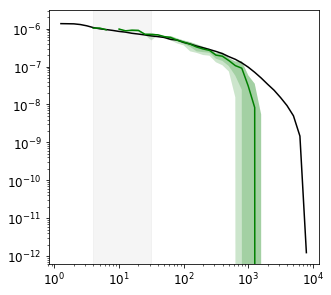

In [33]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_yscale('log')

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop-1)
subplotXShadingRanksILog(ax,ranks_ref,i_Q_lims,alpha=0.15,transformX=False)
# 90% confidence interval for pointwise scaling 2
subplotYShadingRanksILog(ax,ranks_ref,[pr_sc2_I90[:,0],pr_sc_IQR[:,1]],col='green',transformX=False)
# Interquartile range for pointwise scaling 2
subplotYShadingRanksILog(ax,ranks_ref,[pr_sc2_IQR[:,0],pr_sc_IQR[:,1]],col='green',transformX=False)
# Mean of pointwise scaling 2
subplotRanksILog(ax,ranks_ref,[percentiles,pr_sc2_prQ,pr_sc2_vQ],col=['k','green','k'],ltype=['-','-',':'],\
                 transformX=False)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel('Rainfall Intensity (kg/m2/s)')
ax.set_title(r'$\varepsilon\omega_{500}q_v^\star(T)$')

ax2 = ax.twinx()
ax2.set_yscale('log')
subplotRanksILog(ax2,ranks,
                 N_prQ,
                 col='gray',ltype='-',transformX=True)
ax2.tick_params(axis='y', colors='gray')

plt.show()

## Decompose the bias

### into its contributions from qvstar and omega (scaling #3)

In [44]:
iQ_slice = slice(25,35)

In [45]:
qvstar_s_prQ = np.array(list(map(lambda x: meanXAtYPercentiles(x,qvstar_s,pr,rank_locations=rank_locations),ranks)))
omega_500_prQ = np.array(list(map(lambda x: meanXAtYPercentiles(x,omega_500,pr,rank_locations=rank_locations),ranks)))

In [46]:
print("Compute bias")
bias_sc_2 = (pr_sc2_prQ - pr_sc2_vQ)/pr_sc2_prQ
print(np.nanmean(bias_sc_2[iQ_slice]))

Compute bias
-0.00352002286779


In [47]:
print("Compute covariance term")
cov_qvstar_s_omega_500_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,qvstar_s,omega_500,pr,
                                                                           rank_locations=rank_locations),ranks)))

Compute covariance term


In [48]:
contrib_b2_cov_qvstar_s_omega_500 = cov_qvstar_s_omega_500_prQ*(-eps_2/gg)/pr_sc2_prQ

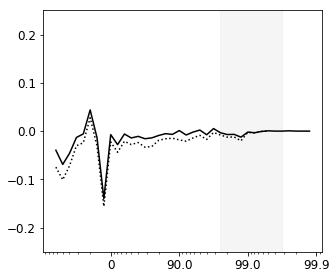

In [49]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
ax.set_ylim((-.25,.25))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop-1)
subplotXShadingRanksILog(ax,ranks,i_Q_lims,alpha=0.15,transformX=False)

subplotRanksILog(ax,ranks,
                 bias_sc_2,
                 col='k',ltype='-',transformX=False)
# subplotRanksILog(ax,ranks,
#                  [contrib_bias_varT,contrib_bias_covOmegaT,contrib_bias_sum],
#                  col=['r','b','k'],ltype=['-','-',':'],transformX=True)
subplotRanksILog(ax,ranks,
                 contrib_b2_cov_qvstar_s_omega_500,
                 col='k',ltype=':',transformX=True)

plt.show()

### into its contributions from T, p and omega (scaling #2)

In [55]:
ts_prQ = np.array(list(map(lambda x: meanXAtYPercentiles(x,ts,pr,rank_locations=rank_locations),ranks)))
ps_prQ = np.array(list(map(lambda x: meanXAtYPercentiles(x,ps,pr,rank_locations=rank_locations),ranks)))
qvstar_ts_prQ = saturationSpecificHumidity(ts_prQ,ps_prQ)
omega_500_prQ = np.array(list(map(lambda x: meanXAtYPercentiles(x,omega_500,pr,rank_locations=rank_locations),ranks)))
cov_ts_omega_500_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,ts,omega_500,pr,
                                                                           rank_locations=rank_locations),ranks)))

In [56]:
contrib_bias_covOmegaT = L_v/R_v*cov_ts_omega_500_prQ/(ts_prQ**2)/omega_500_prQ

print(np.nanmean(contrib_bias_covOmegaT[25:33]))

-0.00805668738987


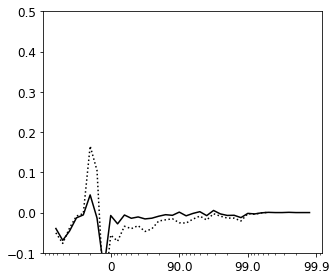

In [57]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
ax.set_ylim((-.1,.5))

# subplotRanksILog(ax,Q_IL,np.zeros(Q_IL[1:-1].shape),ltype=':',col='k')
subplotRanksILog(ax,ranks,
                 bias_sc_2,
                 col='k',ltype='-',transformX=False)
subplotRanksILog(ax,ranks,
                 [contrib_bias_covOmegaT],
                 col=['k'],ltype=[':'],transformX=True)

plt.show()

## Decompose the variance

### into its contributions from qvstar and omega (scaling #3)

In [58]:
iQ_slice_small = slice(iQ_slice.start+2,iQ_slice.stop-2)

In [59]:
pr_sc2_prQ = np.array(list(map(lambda x: meanXAtYPercentiles(x,pr_sc2,pr,rank_locations=rank_locations),ranks)))
var_pr_sc2_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,pr_sc2,pr,rank_locations=rank_locations),ranks)))
var_pr_sc3_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,pr_sc3,pr,rank_locations=rank_locations),ranks)))

In [60]:
print("compute variability terms")
var_qvstar_s_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,qvstar_s,pr,rank_locations=rank_locations),
                                     ranks)))
var_omega_500_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,omega_500,pr,rank_locations=rank_locations),
                                      ranks)))
cov_qvstar_s_omega_500_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,qvstar_s,omega_500,
                                                                           pr,rank_locations=rank_locations),
                                               ranks)))
cov_qvstar_s_2_omega_500_2_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,qvstar_s**2,omega_500**2,pr,
                                                                               rank_locations=rank_locations),
                                                   ranks)))

compute variability terms


In [62]:
print("normalized variability")
norm_var_pr_sc2_prQ = var_pr_sc2_prQ/(pr_sc2_prQ**2)
print(np.nanmean(norm_var_pr_sc2_prQ[iQ_slice_small]))

normalized variability
0.00684792503483


In [66]:
print("normalized contributions")
a_v_3 = (eps_3/gg)**2
contrib_covX2Y2 = a_v_3*cov_qvstar_s_2_omega_500_2_prQ/(pr_sc2_prQ**2)
contrib_var_agg = a_v_3*(var_qvstar_s_prQ+qvstar_s_prQ**2)*(var_omega_500_prQ+omega_500_prQ**2)/(pr_sc2_prQ**2)
contrib_covXY_agg = -a_v_3*(cov_qvstar_s_omega_500_prQ + qvstar_s_prQ*omega_500_prQ)**2/(pr_sc2_prQ**2)
contrib_sum_2_agg = contrib_covX2Y2+contrib_var_agg+contrib_covXY_agg
print(np.nanmean(contrib_covX2Y2[iQ_slice_small]),np.nanmean(contrib_var_agg[iQ_slice_small]),
      np.nanmean(contrib_covXY_agg[iQ_slice_small]),np.nanmean(contrib_sum_2_agg[iQ_slice_small]))

normalized contributions
-0.0261996071662 1.02795434332 -0.994941451683 0.00681328447517


In [67]:
N_prQ = np.array(list(map(lambda x: sampleSizeAtYPercentiles(x,pr,rank_locations=rank_locations),ranks)))

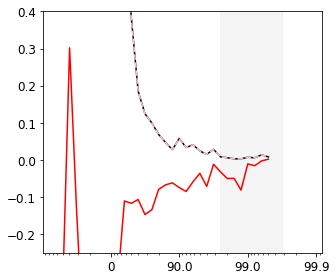

In [69]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
ax.set_ylim((-.25,.4))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop-1)
subplotXShadingRanksILog(ax,ranks,i_Q_lims,alpha=0.15,transformX=False)

subplotRanksILog(ax,ranks,
                 norm_var_pr_sc2_prQ,
                 col='k',ltype='-',transformX=False)
subplotRanksILog(ax,ranks,
                 [contrib_covX2Y2,contrib_var_agg,contrib_covXY_agg,contrib_sum_2_agg],
                 col=['r','b','g','pink'],ltype=['-','-','-','--'],transformX=True)

# ax2 = ax.twinx()
# ax2.set_yscale('log')
# subplotRanksILog(ax2,ranks,
#                  N_prQ,
#                  col='gray',ltype='-',transformX=True)
# ax2.tick_params(axis='y', colors='gray')

plt.show()

In [70]:
print("normalized contributions, expanded terms")
a_v_3 = (eps_3/gg)**2
contrib_covX2Y2 = a_v_3*cov_qvstar_s_2_omega_500_2_prQ/(pr_sc2_prQ**2)
contrib_varX = a_v_3*(omega_500_prQ**2)*var_qvstar_s_prQ/(pr_sc2_prQ**2)
contrib_varY = a_v_3*(qvstar_s_prQ**2)*var_omega_500_prQ/(pr_sc2_prQ**2)
contrib_varXvarY = a_v_3*var_qvstar_s_prQ*var_omega_500_prQ/(pr_sc2_prQ**2)
contrib_cov2XY = -a_v_3*(cov_qvstar_s_omega_500_prQ**2)/(pr_sc2_prQ**2)
contrib_covXY = -a_v_3*2*qvstar_s_prQ*omega_500_prQ*cov_qvstar_s_omega_500_prQ/(pr_sc2_prQ**2)
contrib_sum_2 = contrib_covX2Y2 + contrib_varX + contrib_varY + contrib_varXvarY + contrib_cov2XY + contrib_covXY

print(np.nanmean(contrib_varX[iQ_slice_small]),np.nanmean(contrib_varY[iQ_slice_small]),
      np.nanmean(contrib_varXvarY[iQ_slice_small]),
      np.nanmean(contrib_cov2XY[iQ_slice_small]),np.nanmean(contrib_covXY[iQ_slice_small]),
      np.nanmean(contrib_sum_2[iQ_slice_small]))

normalized contributions, expanded terms
0.00502928477492 0.0149781796825 0.000107895348601 -9.40602212963e-05 0.0129915920567 0.00681328447517


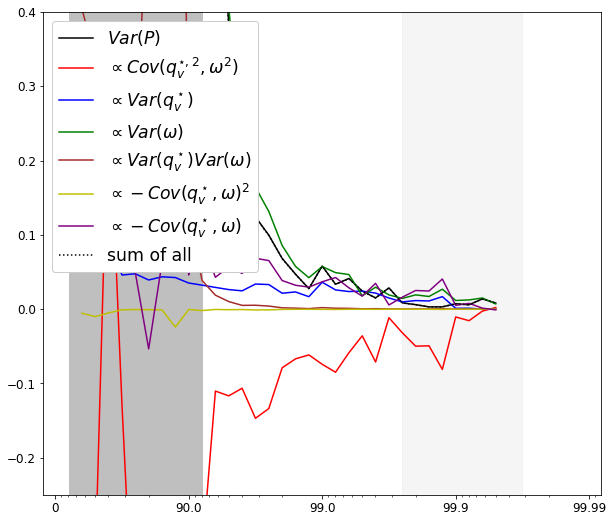

In [71]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,9))
ax.set_ylim((-.25,.4))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop-1)
subplotXShadingRanksILog(ax,ranks,i_Q_lims,alpha=0.15,transformX=False)

subplotRanksILog(ax,ranks,
                 norm_var_pr_sc2_prQ,
                 col='k',ltype='-',transformX=False)
subplotRanksILog(ax,ranks,
                 [contrib_covX2Y2,contrib_varX,contrib_varY,contrib_varXvarY,contrib_cov2XY,contrib_covXY,contrib_sum_2],
                 col=['r','b','g','brown','y','purple','k'],ltype=['-','-','-','-','-','-',':'],transformX=False)

subplotXShadingRanksILog(ax,ranks,(0,10),alpha=1,col='white',transformX=True)

leg = ax.legend([r'$Var(P)$',
                 r'$\propto Cov(q_v^{\star,2},\omega^2)$',
                 r'$\propto Var(q_v^\star)$',
                 r'$\propto Var(\omega)$',
                 r'$\propto Var(q_v^\star)Var(\omega)$',
                 r'$\propto -Cov(q_v^\star,\omega)^2$',
                 r'$\propto -Cov(q_v^\star,\omega)$',
                 r'sum of all'],
                 loc='upper left',
                 fontsize='xx-large')
leg.get_frame().set_alpha(1)

# ax2 = ax.twinx()
# ax2.set_yscale('log')
# subplotRanksILog(ax2,ranks,
#                  N_prQ,
#                  col='gray',ltype='-',transformX=True)
# ax2.tick_params(axis='y', colors='gray')

plt.show()


### into its contributions from T, p and omega (scaling #2)

#### From T and omega only

In [72]:
var_pr_sc2_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,pr_sc2,pr,rank_locations=rank_locations),ranks)))
var_pr_sc2_div_eps2_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,pr_sc2/eps_2,pr,
                                                                         rank_locations=rank_locations),ranks)))

In [73]:
var_ts_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,ts,pr,rank_locations=rank_locations),ranks)))
var_omega_500_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,omega_500,pr,rank_locations=rank_locations),
                                      ranks)))
cov_ts_omega_500_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,ts,omega_500,pr,rank_locations=rank_locations),
                                         ranks)))
cov_ts_omega_500_2_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,ts,omega_500**2,pr,rank_locations=rank_locations),
                                         ranks)))

In [74]:
var_ps_prQ = np.array(list(map(lambda x: varXAtYPercentiles(x,ps,pr,rank_locations=rank_locations),ranks)))
cov_ps_ts_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,ps,ts,pr,rank_locations=rank_locations),ranks)))
cov_ps_omega_500_prQ = np.array(list(map(lambda x: covAtYPercentiles(x,ps,omega_500,pr,rank_locations=rank_locations),
                                         ranks)))

In [75]:
contrib_var_covTomega2 = 2*L_v/R_v*cov_ts_omega_500_2_prQ/(ts_prQ*omega_500_prQ)**2
contrib_var_covTomega = -2*L_v/R_v*cov_ts_omega_500_prQ/((ts_prQ**2)*omega_500_prQ)
contrib_var_varT = ((L_v/R_v)**2)*var_ts_prQ/(ts_prQ**4)
contrib_var_varomega = var_omega_500_prQ/(omega_500_prQ**2)
contrib_var_sum = contrib_var_covTomega2+contrib_var_covTomega+contrib_var_varT+contrib_var_varomega
all_contribs_var = [contrib_var_covTomega2,contrib_var_covTomega,contrib_var_varT,contrib_var_varomega,contrib_var_sum]
for contrib in all_contribs_var:
    print(np.nanmean(contrib[iQ_slice_small]),end=' ')

-0.0296722712852 0.0139534818858 0.00593333427449 0.0147845163564 0.0049990612315 

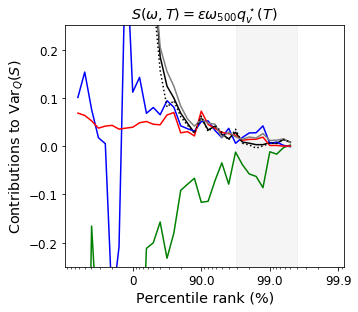

In [88]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_ylim((-0.25,0.25))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop-1)
subplotXShadingRanksILog(ax,Q_IL,i_Q_lims,alpha=0.15,transformX=False)


# subplotRanksILog(ax,ranks,np.zeros(ranks.shape),ltype=':',col='k')
subplotRanksILog(ax,ranks,
                 norm_var_pr_sc2_prQ,
                 col='k',ltype='-',transformX=False)

subplotRanksILog(ax,ranks,
                 all_contribs_var,
                 col=['green','blue','red','grey','k'],ltype=['-','-','-','-',':'],transformX=True)


# # Plot contributions
# ax2 = ax.twinx()
# ax2.set_ylim((-12,80))

# subplotRanksILog(ax2,ranks,
#                  var_terms[1:5],
#                  col=['green','blue','red','grey'],transformX=False)
# subplotRanksILog(ax2,ranks,
#                  var_terms_sum,
#                  col='k',ltype=':',transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel(r'Contributions to Var$_Q(S)$')
ax.set_title(r'$S(\omega,T)=\varepsilon\omega_{500}q_v^\star(T)$')

# ax2.legend([r'$\alpha_1 Var(T)$',r'$\alpha_2 Cov(T,\omega)$',r'$\alpha_3 Var(\omega)$','sum'])

plt.show()

#### Now include p

OUTDATED CODE BELOW, PLEASE IGNORE

In [77]:
a_var = (eps_2/gg*qvstar_ts_prQ)**2
# a_norm = 2*(qvstar_ts_prQ**2)
b_var = (omega_500_prQ*L_v/R_v/ts_prQ**2)
c1_var = a_var*b_var**2
c2_var = a_var*2*b_var
c3_var = a_var
c4_var = (eps_2/gg)**2/ps_prQ**2
c5_var = -2*(eps_2/gg)**2*L_v/R_v*omega_500_prQ*qvstar_ts_prQ/ts_prQ**2/ps_prQ
c6_var = -(eps_2/gg)**2*qvstar_ts_prQ/ps_prQ


In [78]:
contrib_varT = c1_var*var_ts_prQ/pr_sc2_vQ**2
contrib_covTomega = c2_var*cov_ts_omega_500_prQ/pr_sc2_vQ**2
contrib_varomega = c3_var*var_omega_500_prQ/pr_sc2_vQ**2
contrib_varP = c4_var*var_ps_prQ/pr_sc2_vQ**2
contrib_covPT = c5_var*cov_ps_ts_prQ/pr_sc2_vQ**2
contrib_covPomega = c6_var*cov_ps_omega_500_prQ/pr_sc2_vQ**2
contrib_bias = -contrib_bias_sum**2
sum_contribs = contrib_varT+contrib_covTomega+contrib_varomega+\
contrib_varP+contrib_covPT+contrib_covPomega+contrib_bias

# contrib_norm_varT = c1_norm*var_ts_prQ
# contrib_norm_covTomega = c2_norm*cov_ts_omega_500_prQ
# contrib_norm_varomega = c3_norm*var_omega_500_prQ
# sum_contribs = contrib_norm_varT+contrib_norm_covTomega+contrib_norm_varomega
# sum_contribs_norm = contrib_norm_varT+contrib_norm_varomega

print(np.nanmean(sum_contribs[iQ_slice_small]),np.nanmean(var_pr_sc2_prQ[iQ_slice_small]),
      np.nanmean(var_pr_sc2_div_eps2_prQ[iQ_slice_small]))
# print(sum_contribs_norm[25:33].mean(),var_pr_sc2_prQ[25:33].mean(),var_pr_sc2_div_eps2_prQ[25:33].mean())

NameError: name 'contrib_bias_sum' is not defined

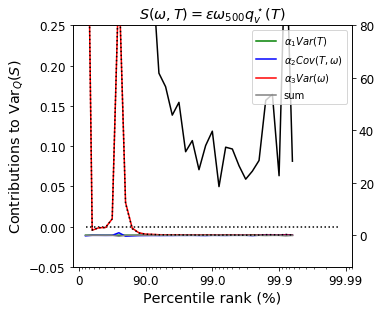

In [331]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_ylim((-0.05,0.25))

# # Grey shading 
# i_Q_lims = (i_Q-5,i_Q+4)
# subplotXShadingRanksILog(ax,Q_IL,i_Q_lims,alpha=0.15,transformX=False)

# normalizing_factor = (centers.copy())**2
# normalizing_factor[:5] = np.nan
var_terms = [var_pr_sc2_prQ/pr_sc2_vQ**2,contrib_varT,contrib_covTomega,contrib_varomega,contrib_bias]
# var_terms_normalized = [x/normalizing_factor for x in var_terms]
var_terms_sum = var_terms[1]+var_terms[2]+var_terms[3]+var_terms[4]

# var_terms_n_sum = var_terms_normalized[1]+var_terms_normalized[2]+var_terms_normalized[3]
# var_terms_n_sum = var_terms_normalized[1]+var_terms_normalized[3]
# var_terms_n_sum = var_terms_normalized[1]+2*var_terms_normalized[2]+var_terms_normalized[3]

subplotRanksILog(ax,ranks,np.zeros(ranks.shape),ltype=':',col='k')
subplotRanksILog(ax,ranks,
                 var_terms[0],
                 col='k',ltype='-',transformX=False)

# Plot contributions
ax2 = ax.twinx()
ax2.set_ylim((-12,80))

subplotRanksILog(ax2,ranks,
                 var_terms[1:5],
                 col=['green','blue','red','grey'],transformX=False)
subplotRanksILog(ax2,ranks,
                 var_terms_sum,
                 col='k',ltype=':',transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel(r'Contributions to Var$_Q(S)$')
ax.set_title(r'$S(\omega,T)=\varepsilon\omega_{500}q_v^\star(T)$')

ax2.legend([r'$\alpha_1 Var(T)$',r'$\alpha_2 Cov(T,\omega)$',r'$\alpha_3 Var(\omega)$','sum'])

plt.show()

Why don't I get the same order of magnitude?
Check the order of magnitude of $\varepsilon_V$ for all variables, to see if I can actually do this Taylor expansion.

In [274]:
epsilon_T = np.sqrt(var_ts_prQ)/ts_prQ
epsilon_omega_500 = np.sqrt(var_omega_500_prQ)/omega_500_prQ
epsilon_ps = np.sqrt(var_ps_prQ)/ps_prQ
print(np.nanmean(epsilon_T[iQ_slice]),np.nanmean(epsilon_omega_500[iQ_slice]),np.nanmean(epsilon_ps[iQ_slice]))

0.0169689080102 -0.180611738943 0.0874370173534


## Maps of predictor variables

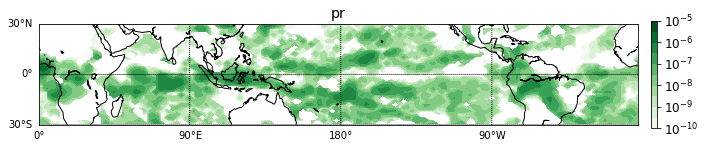

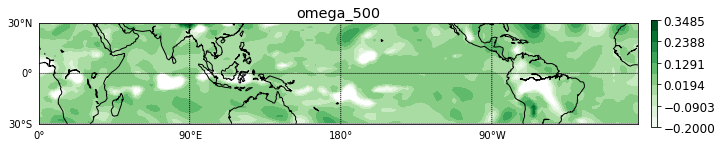

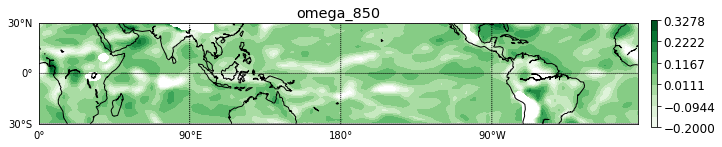

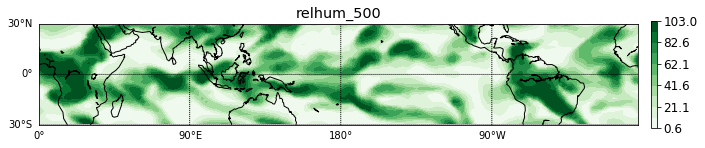

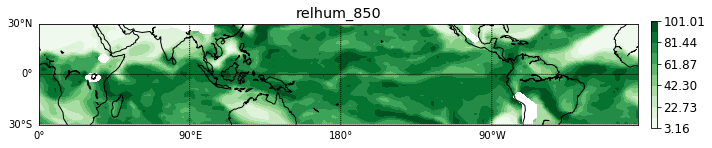

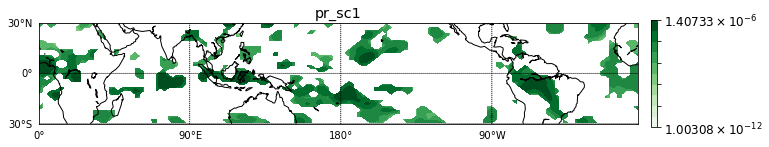

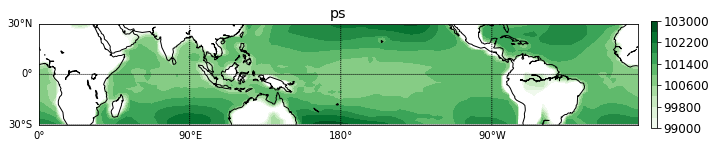

In [87]:
## Plot

vars2plot = ['pr','omega_500','omega_850','relhum_500','relhum_850','pr_sc1','ps']
v_lims ={'pr':[1e-10,1e-5],
         'omega_500':[-0.2,None],
         'omega_850':[-0.2,None],
         'relhum_500':[None,None],
         'relhum_850':[None,None],
         'pr_sc1':[None,None],
         'ps':[99000,103000]}
mode = {'pr':'log','omega_500':None,'omega_850':None,'relhum_500':None,'relhum_850':None,'pr_sc1':'log','ps':None}

for var in vars2plot:
    
    v = getattr(thismodule,var)[0,...]

    plotMapTropics(lon2D.compute(),lat2D.compute(),v.compute(),v_min=v_lims[var][0],v_max=v_lims[var][1],mode=mode[var],title=var)
    plt.show()